# AUTOENCODER


Este es un decodificador de imagenes con ruido.
**Este Autocodificador va a tomer una imagen con ruido y luego va a devolverla en perfectas condiciones para ser legible.**


Este script corresponde a un Ejercicio de Redes Neuronales Avanzado.






Importacion de los paquetes necesarios


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import random

Cargando los Datos
## Se utilizo un set de datos contenido dentro de mnist, paquete TensorFlow

In [3]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 3s 0us/step


Visualizacion de los datos


In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
X_train.shape

(60000, 28, 28)

###Seleccionando Imagen Aleatoria


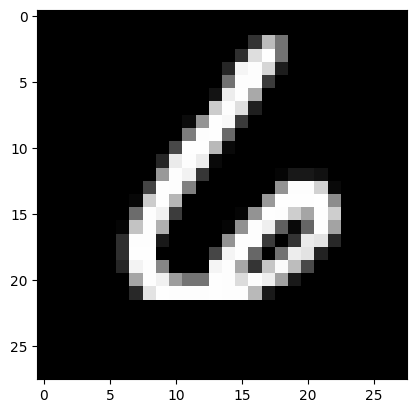

In [6]:
i = random.randint(1,60000)
plt.imshow(X_train[i], cmap='gray')
plt.show()

##Busqueda de las "Etiquetas" de las imagenes o Labels

In [7]:
label = y_train[i]
print(label)

6


#Agregando Ruido a las imagenes

#Normalizando imagenes


In [8]:
X_train = X_train / 255
X_test = X_test / 255

##Agregando Ruido propiamente
Se sige teniendo en cuenta el Shape original de las imagenes del set de datos


In [9]:
agregando_ruido = np.random.randn(*(28,28))
factor_ruido = 0.3
agregando_ruido = factor_ruido * np.random.randn(*(28,28))

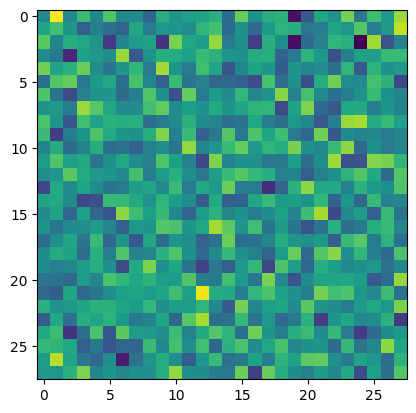

In [10]:
plt.imshow(agregando_ruido)

# Tomando una imagen aleatoria y agregandole ruido, a modo de prueba

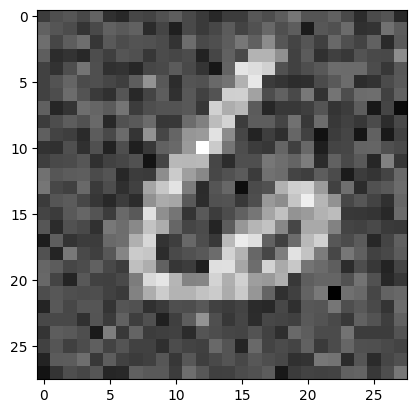

In [11]:
factor_ruido = 0.2
imagen_ejemplo = X_train[i]
imagen_ruidosa = imagen_ejemplo + factor_ruido * np.random.randn(*(28,28))
plt.imshow(imagen_ruidosa, cmap='gray')

##Modificando rango de las imagenes de 0 a 1, esto para evitar prblemas con el aprendizaje de la Red

In [12]:
imagen_ruidosa.max()

1.5158966204447355

In [13]:
imagen_ruidosa.min()

-0.6193226096212756

In [14]:
imagen_ruidosa = np.clip(imagen_ruidosa , 0. , 1.)

In [15]:
print(f"El rango de las imagenes se encuentra en {imagen_ruidosa.min() , {imagen_ruidosa.max()}}")

El rango de las imagenes se encuentra en (0.0, {1.0})


##Aplicando transformaciones a todas las imagenes del set de datos

In [16]:
X_train_ruido = []
factor_ruido = 0.2
for imagen in X_train:
  imagen_ruidosa = imagen_ejemplo + factor_ruido * np.random.randn(*(28,28))
  imagen_ruidosa = np.clip(imagen_ruidosa , 0. , 1.)
  X_train_ruido.append(imagen_ruidosa)

#Transformando set de imagenes con ruido a una matriz, haciendo uso de Numpy


In [17]:
X_train_ruido = np.array(X_train_ruido)

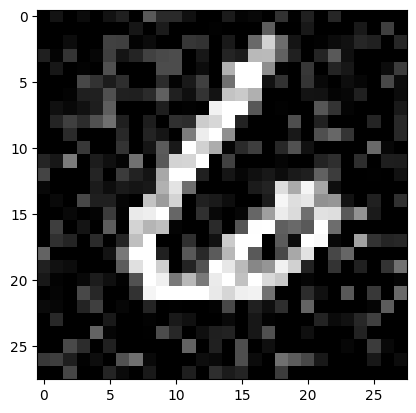

In [18]:
plt.imshow(X_train_ruido[i], cmap='gray')

##Aplicando conversion de imagenes para el set de datos de entrenamiento
Lo que se busca es que la red aprenda de la mejor manera, para eso voy a colocar el ruido en un factor mas elevado.

In [19]:
X_test_ruido = []
factor_ruido = 0.4

In [20]:
for imagen_ejemplo in X_test:
  imagen_ruidosa = imagen_ejemplo + factor_ruido * np.random.randn(*(28,28))
  imagen_ruidosa = np.clip(imagen_ruidosa , 0. , 1.)
  X_test_ruido.append(imagen_ruidosa)

In [21]:
X_test_ruido = np.array(X_test_ruido)

In [22]:
X_test_ruido.shape

(10000, 28, 28)

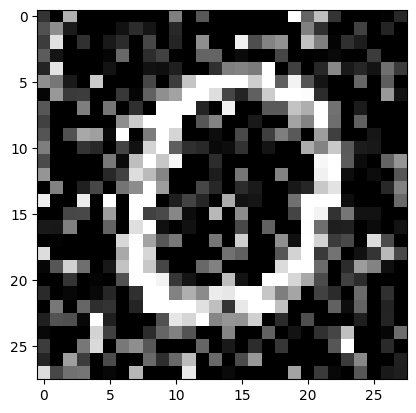

In [23]:
plt.imshow(X_test_ruido[10], cmap='gray')

#Creando el Modelo

Modelo secuencial de la liblioteca Keras

In [24]:
autoencoder = tf.keras.models.Sequential()

Armando la capa convolucional

In [25]:
autoencoder.add(tf.keras.layers.Conv2D(filters=16,
                                       kernel_size=(3,3),
                                       padding = 'same',
                                       strides=1,
                                       input_shape=(28,28,1)))

In [26]:
autoencoder.add(tf.keras.layers.MaxPooling2D((2,2), padding= "same"))

In [27]:
autoencoder.add(tf.keras.layers.Conv2D(8, (3,3) , padding='same'))
autoencoder.add(tf.keras.layers.MaxPooling2D((2,2), padding= "same"))

##Imagen Codificada


In [28]:
autoencoder.add(tf.keras.layers.Conv2D(8,(3,3), strides = 1 , padding="same"))

# Imagen Decodificada

In [29]:
autoencoder.add(tf.keras.layers.UpSampling2D((2,2)))

In [30]:
autoencoder.add(tf.keras.layers.Conv2DTranspose(8,(3,3), strides = 1 , padding="same"))

In [31]:
autoencoder.add(tf.keras.layers.UpSampling2D((2,2)))

#Utilizando Funcion Sigmoid como activacion
En este caso, se aplica a la capa de salida solamente.


In [32]:
autoencoder.add(tf.keras.layers.Conv2DTranspose(1,(3,3), strides = 1 , activation="sigmoid" , padding="same"))

# Compilando el Modelo

Binary cross entropy y adam como funcion de perdida.
Tasa de Aprendizaje : 0,001

In [33]:
autoencoder.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

##Mostrando Resumen del Modelo

In [34]:
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 8)           0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 8)           584       
                                                                 
 up_sampling2d (UpSampling2  (None, 14, 14, 8)         0

#Comenzando el Entrenamiento del Modelo

In [35]:
autoencoder.fit(X_train_ruido.reshape(-1,28,28,1), X_train.reshape(-1,28,28,1),
                epochs=10,
                batch_size=200)


Epoch 1/10
300/300 [==============================] - 18s 6ms/step - loss: 0.3376 - accuracy: 0.7898
Epoch 2/10
300/300 [==============================] - 2s 6ms/step - loss: 0.2694 - accuracy: 0.7979
Epoch 3/10
300/300 [==============================] - 2s 6ms/step - loss: 0.2672 - accuracy: 0.7992
Epoch 4/10
300/300 [==============================] - 2s 5ms/step - loss: 0.2660 - accuracy: 0.8003
Epoch 5/10
300/300 [==============================] - 2s 6ms/step - loss: 0.2653 - accuracy: 0.8010
Epoch 6/10
300/300 [==============================] - 3s 9ms/step - loss: 0.2652 - accuracy: 0.8010
Epoch 7/10
300/300 [==============================] - 3s 11ms/step - loss: 0.2649 - accuracy: 0.8010
Epoch 8/10
300/300 [==============================] - 2s 8ms/step - loss: 0.2646 - accuracy: 0.8015
Epoch 9/10
300/300 [==============================] - 3s 10ms/step - loss: 0.2643 - accuracy: 0.8018
Epoch 10/10
300/300 [==============================] - 2s 8ms/step - loss: 0.2643 - accuracy: 0.8

## Realizando la evalacion del entrenamiento del modelo


In [36]:
sin_ruido = autoencoder.predict(X_test_ruido[:15].reshape(-1,28,28,1))

1/1 [==============================] - 1s 1s/step


## Mostrando formato de la imagen predicha por el modelo


In [37]:
sin_ruido.shape

(15, 28, 28, 1)

## Mostrando todas las imagenes con ruido y la prediccion del modelo sobre a que numero corresponde la imagen borrosa

El porcentaje de acierto en las imagenes del modelo es de -> 0.8016, este numero se puede mejorar agregando mas capas convolucionales para el tratamiento de las imagenes, esto a costas del tiempo de espera para el entrenamiento de la Red

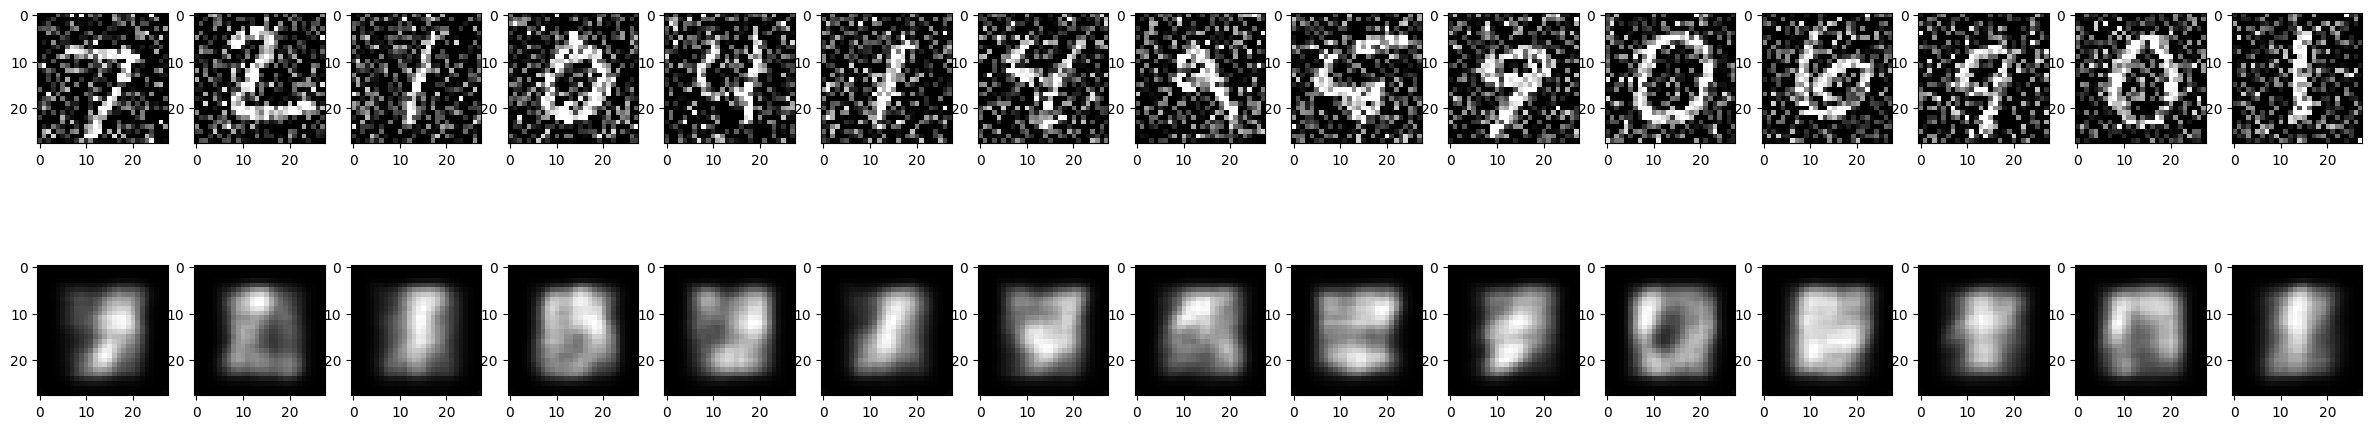

In [38]:
fig , axes = plt.subplots(nrows=2 , ncols=15 , figsize=(30,6))
for imagen , fila in zip([X_test_ruido[:15],sin_ruido], axes):
  for imagen, ax in zip(imagen, fila):
    ax.imshow(imagen.reshape(28,28), cmap='gray')


#*En conclusion , este modelo es capaz de reconocer imagenes con ruido y luego mostrar de que imagen se trata*